In [61]:
#Download the datasets

from downloading_data import *
paths = download_datasets()
print(paths)


Path to dataset files: C:\Users\karti\.cache\kagglehub\datasets\mjshri23\life-expectancy-and-socio-economic-world-bank\versions\1
Path to dataset files: C:\Users\karti\.cache\kagglehub\datasets\mahdiehhajian\life-expectancy-around-the-world\versions\1
Path to dataset files: C:\Users\karti\.cache\kagglehub\datasets\iamsouravbanerjee\life-expectancy-at-birth-across-the-globe\versions\2
['C:\\Users\\karti\\.cache\\kagglehub\\datasets\\mjshri23\\life-expectancy-and-socio-economic-world-bank\\versions\\1', 'C:\\Users\\karti\\.cache\\kagglehub\\datasets\\mahdiehhajian\\life-expectancy-around-the-world\\versions\\1', 'C:\\Users\\karti\\.cache\\kagglehub\\datasets\\iamsouravbanerjee\\life-expectancy-at-birth-across-the-globe\\versions\\2']


## Data Visualization

In [62]:
#Load Dataset #1

import pandas as pd

df = pd.read_csv(paths[0] + '\\life expectancy.csv')
df.rename(columns={'Life Expectancy World Bank': 'Life Expectancy'}, inplace=True)
df


,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.000000,NaN,NaN,10.809000,NaN,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.000000,4.483516,NaN,4.004000,NaN,NaN,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288,4.9,3230.000000,7.139524,3.45870,18.575001,NaN,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,NaN,NaN,520.000000,5.865939,NaN,NaN,NaN,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544,2.8,97200.000000,2.484370,NaN,2.493000,NaN,NaN,144678.14,65271.91,481740.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,Vanuatu,VUT,East Asia & Pacific,Lower middle income,2019,70.474,12.4,209.999993,3.360347,1.77788,1.801000,3.0,NaN,12484.18,26032.56,69213.56
3302,Samoa,WSM,East Asia & Pacific,Lower middle income,2019,73.321,4.4,300.000012,6.363094,4.70625,8.406000,4.0,47.698788,6652.84,9095.19,43798.62
3303,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,2019,64.131,6.3,439640.014648,9.109355,5.91771,28.469999,NaN,NaN,3174676.10,13198944.71,10214261.89
3304,Zambia,ZMB,Sub-Saharan Africa,Low income,2019,63.886,NaN,6800.000191,5.312203,4.46518,12.520000,2.5,NaN,510982.75,4837094.00,2649687.82


### 

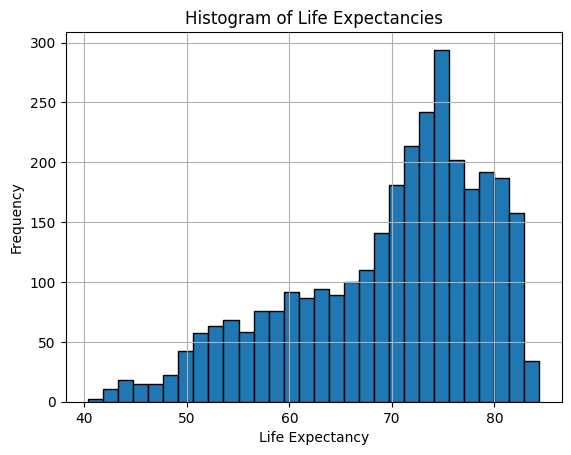

In [63]:
#Histogram of Life Expectancies
import matplotlib.pyplot as plt

plt.figure()
df['Life Expectancy'].hist(bins=30, edgecolor='black')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.title('Histogram of Life Expectancies')
plt.savefig('Life Expectancy and Socioeconomic World/histogram_life_expectancies.png')
plt.show()

In [64]:
#Plot timeseries for each country.
import matplotlib.pyplot as plt

grouped = df.groupby('Country Name')
for name, group in grouped:
    plt.figure()
    plt.plot(group['Year'], group['Life Expectancy'], marker='o', label=name)
    plt.xlabel('Year')
    plt.ylabel('Life Expectancy')
    plt.title(f'Life Expectancy Over Time for {name}')
    plt.legend()
    # plt.show()
    plt.savefig(f'Life Expectancy and Socioeconomic World/life_expectancies_vs_time/{name}_life_expectancy.png')
    plt.close()

## Data Cleaning

In [65]:
# One hot encoding.
regions = df['Region'].unique()
print("Regions:", regions)

income_groups = df['IncomeGroup'].unique()
print("Income Groups:", income_groups)

df = pd.get_dummies(df, columns=['Region', 'IncomeGroup'], drop_first=True)
df.head()

Regions: ['South Asia' 'Sub-Saharan Africa' 'Europe & Central Asia'
 'Middle East & North Africa' 'Latin America & Caribbean'
 'East Asia & Pacific' 'North America']
Income Groups: ['Low income' 'Lower middle income' 'Upper middle income' 'High income']


,Country Name,Country Code,Year,Life Expectancy,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,...,NonCommunicable,Region_Europe & Central Asia,Region_Latin America & Caribbean,Region_Middle East & North Africa,Region_North America,Region_South Asia,Region_Sub-Saharan Africa,IncomeGroup_Low income,IncomeGroup_Lower middle income,IncomeGroup_Upper middle income
0,Afghanistan,AFG,2001,56.308,47.8,730.0,NaN,NaN,10.809000,NaN,...,5795426.38,False,False,False,False,True,False,True,False,False
1,Angola,AGO,2001,47.059,67.5,15960.0,4.483516,NaN,4.004000,NaN,...,2663516.34,False,False,False,False,False,True,False,True,False
2,Albania,ALB,2001,74.288,4.9,3230.0,7.139524,3.4587,18.575001,NaN,...,532324.75,True,False,False,False,False,False,False,False,True
3,Andorra,AND,2001,NaN,NaN,520.0,5.865939,NaN,NaN,NaN,...,13636.64,True,False,False,False,False,False,False,False,False
4,United Arab Emirates,ARE,2001,74.544,2.8,97200.0,2.484370,NaN,2.493000,NaN,...,481740.70,False,False,True,False,False,False,False,False,False


In [66]:
#Fill in NaN values with the average of the previous and next values.
def fill_nan_with_avg(df, column):
    for i in range(1, len(df) - 1):
        if pd.isna(df.at[i, column]):
            prev_value = df.at[i - 1, column]
            next_value = df.at[i + 1, column]
            if not pd.isna(prev_value) and not pd.isna(next_value):
                df.at[i, column] = (prev_value + next_value) / 2

numerical_columns = df.select_dtypes(include=['float64']).columns
for column in numerical_columns:
    fill_nan_with_avg(df, column)

df.head()

,Country Name,Country Code,Year,Life Expectancy,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,...,NonCommunicable,Region_Europe & Central Asia,Region_Latin America & Caribbean,Region_Middle East & North Africa,Region_North America,Region_South Asia,Region_Sub-Saharan Africa,IncomeGroup_Low income,IncomeGroup_Lower middle income,IncomeGroup_Upper middle income
0,Afghanistan,AFG,2001,56.308,47.80,730.0,NaN,NaN,10.809000,NaN,...,5795426.38,False,False,False,False,True,False,True,False,False
1,Angola,AGO,2001,47.059,67.50,15960.0,4.483516,NaN,4.004000,NaN,...,2663516.34,False,False,False,False,False,True,False,True,False
2,Albania,ALB,2001,74.288,4.90,3230.0,7.139524,3.4587,18.575001,NaN,...,532324.75,True,False,False,False,False,False,False,False,True
3,Andorra,AND,2001,74.416,3.85,520.0,5.865939,NaN,10.534000,NaN,...,13636.64,True,False,False,False,False,False,False,False,False
4,United Arab Emirates,ARE,2001,74.544,2.80,97200.0,2.484370,NaN,2.493000,NaN,...,481740.70,False,False,True,False,False,False,False,False,False


In [67]:
non_nan_columns = df.columns[df.notna().all()].tolist()
print("Columns with no NaN values:", non_nan_columns)

Columns with no NaN values: ['Country Name', 'Country Code', 'Year', 'Life Expectancy', 'CO2', 'Injuries', 'Communicable', 'NonCommunicable', 'Region_Europe & Central Asia', 'Region_Latin America & Caribbean', 'Region_Middle East & North Africa', 'Region_North America', 'Region_South Asia', 'Region_Sub-Saharan Africa', 'IncomeGroup_Low income', 'IncomeGroup_Lower middle income', 'IncomeGroup_Upper middle income']


## Preliminary Feature Analysis

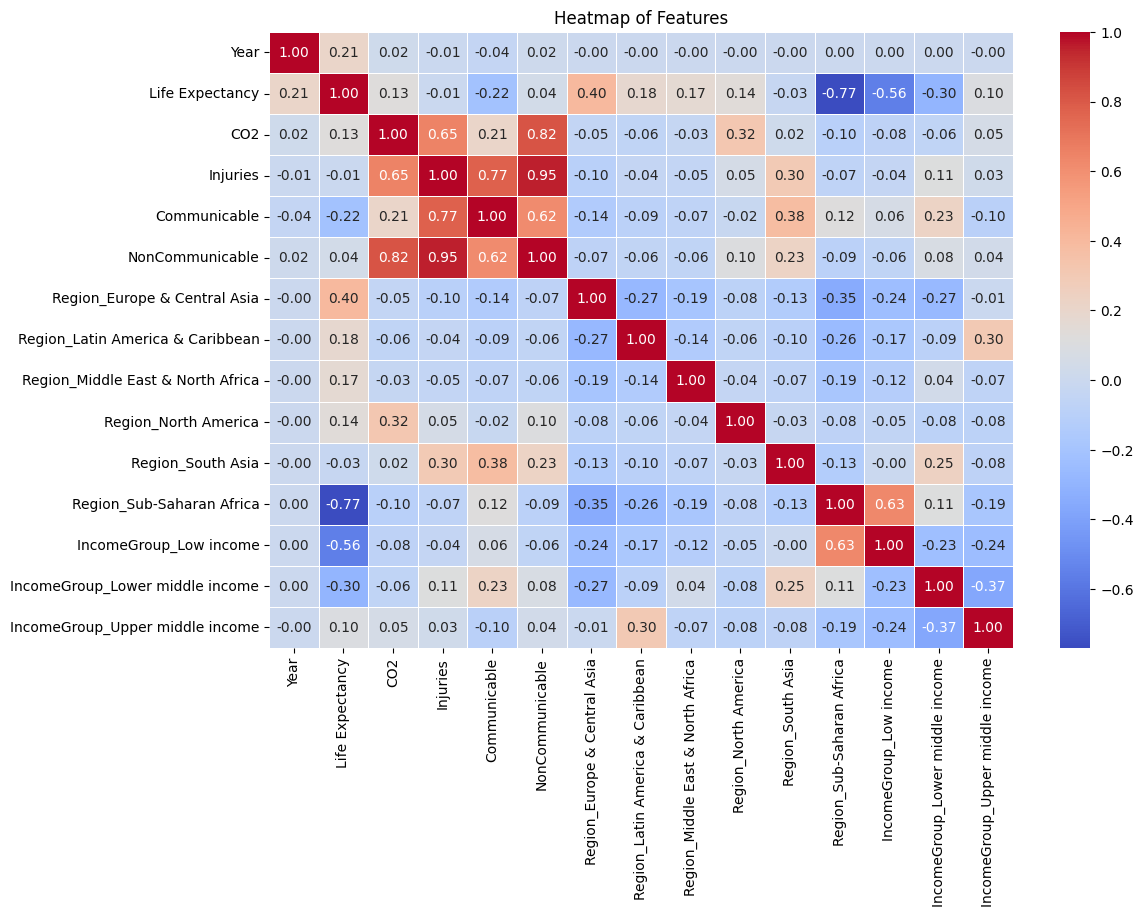

In [68]:
# Heatmap of the Dataset
df_copy = df[non_nan_columns].copy()
df_copy = df_copy.select_dtypes(exclude=['object'])
df_copy = df_copy.astype({col: 'int' for col in df_copy.select_dtypes(include=['bool']).columns})
# df_copy

import seaborn as sns

corr = df_copy.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Features')
plt.savefig('Life Expectancy and Socioeconomic World/heatmap_features.png')
plt.show()

In [69]:
#Final Data Cleaning.

from sklearn.preprocessing import StandardScaler

df_copy['Year'] = df_copy['Year'] - 2001

scaler = StandardScaler()
df_copy['CO2'] = scaler.fit_transform(df_copy[['CO2']])

df_copy['Population'] = df_copy['Communicable'] + df_copy['NonCommunicable']
population_columns = ['Injuries', 'Communicable', 'NonCommunicable']
for column in population_columns:
    df_copy[column] = df_copy[column] / df_copy['Population']

df_copy.head()

,Year,Life Expectancy,CO2,Injuries,Communicable,NonCommunicable,Region_Europe & Central Asia,Region_Latin America & Caribbean,Region_Middle East & North Africa,Region_North America,Region_South Asia,Region_Sub-Saharan Africa,IncomeGroup_Low income,IncomeGroup_Lower middle income,IncomeGroup_Upper middle income,Population
0,0,56.308,-0.199885,0.140767,0.625730,0.374270,0,0,0,0,1,0,1,0,0,15484620.08
1,0,47.059,-0.179716,0.100484,0.807740,0.192260,0,0,0,0,0,1,0,1,0,13853726.87
2,0,74.288,-0.196574,0.173913,0.209285,0.790715,1,0,0,0,0,0,0,0,1,673219.53
3,0,74.416,-0.200163,0.118474,0.048531,0.951469,1,0,0,0,0,0,0,0,0,14332.20
4,0,74.544,-0.072130,0.264488,0.119324,0.880676,0,0,1,0,0,0,0,0,0,547012.61


## Linear Regression

In [70]:
#Linear Regression Model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_copy.drop(columns=['Life Expectancy'])
y = df_copy['Life Expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [71]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

Mean Squared Error: 15.495222847399907
R-squared Score: 0.8350962157137237
